# Семинар 7: Обучение машин (Machine learning). Введение в Scikit-Learn

<a href="https://colab.research.google.com/github/SergeyMalashenko/MachineLearning_Summer_2023/blob/main/seminars/7/seminar_7.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn           as sns
import numpy             as np
import scipy             as sp

In [8]:
# common plot formatting for below
def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('feature 1', color='gray')
    ax.set_ylabel('feature 2', color='gray')
    ax.set_title(title, color='gray')

## Что такое машинное обучение?

Машинное обучение занимается построением математических моделей для исследования данных. Задачи «обучения» начинаются с появлением у этих моделей
настраиваемых параметров, которые можно «настроить» для описания наблюдаемых данных, таким образом, программа как бы обучается на данных. Как
только эти модели обучатся на имеющихся данных наблюдений, их можно будет использовать для предсказания и понимания различных аспектов данных новых
наблюдений. Насколько подобное математическое, основанное на моделях обучение схоже с обучением человеческого мозга?

Для эффективного использования этих инструментов необходимо понимать общую формулировку задачи машинного обучения, поэтому начнем с широкой классификации типов подходов, которые мы будем обсуждать.

## Категории машинного обучения

На самом фундаментальном уровне машинное обучение можно разделить на два основных типа: контролируемое обучение (supervised learning) и неконтролируемое обучение (unsupervised learning).

*Supervised learning* предполагает моделирование связи между измеряемыми характеристиками данных и некоторой меткой, связанной с этими данными; после определения этой модели она может быть использована для предсказания меток на новых неизвестных данных.
Далее можно ввести разделение на задачи *классификации* и *регрессии*: в классификации метками являются дискретные категории, а в регрессии - непрерывные величины.

*Unsupervised learning* предполагает моделирование характеристик набора данных без привязки к каким-либо меткам и часто описывается как "позволяющее набору данных говорить самому за себя".
Эти модели включают такие задачи, как *кластеризация (clustering)* и *уменьшение размерности (dimensionality reduction)*.
Алгоритмы кластеризации выделяют отдельные группы данных, а алгоритмы снижения размерности ищут более сжатые представления данных.

Кроме того, существуют так называемые методы *semi-supervised learning*, которые находятся где-то между контролируемым и неконтролируемым обучением.
Методы *semi-supervised learning* обучения часто полезны, когда доступны только неполные метки.

## Задача классификации: предсказание дискретных меток 

In [9]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# create 50 separable points
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# fit the support vector classifier model
clf = SVC(kernel='linear')
clf.fit(X, y)

# create some new points to predict
X2, _ = make_blobs(n_samples=80, centers=2,
                   random_state=0, cluster_std=0.80)
X2 = X2[50:]

# predict the labels
y2 = clf.predict(X2)

(-1.0, 4.0, -2.0, 7.0)

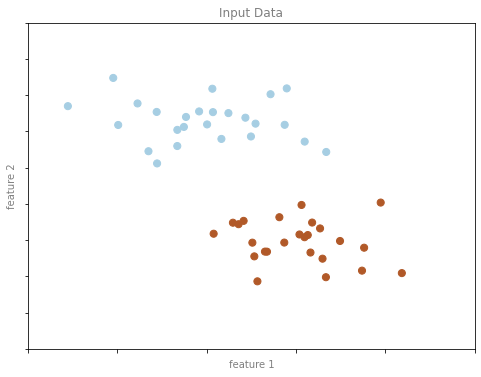

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
point_style = dict(cmap='Paired', s=50)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)

# format plot
format_plot(ax, 'Input Data')
ax.axis([-1, 4, -2, 7])

(-1.0, 4.0, -2.0, 7.0)

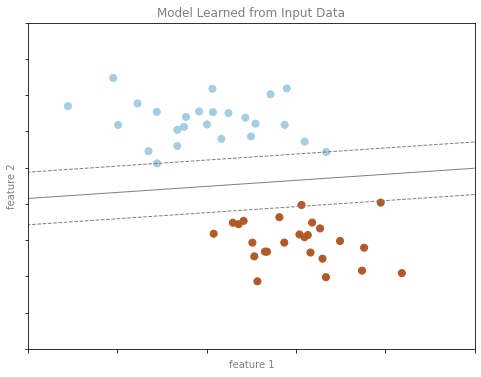

In [11]:
# Get contours describing the model
xx = np.linspace(-1, 4, 10)
yy = np.linspace(-2, 7, 10)
xy1, xy2 = np.meshgrid(xx, yy)
Z = np.array([clf.decision_function([t]) будетfor t in zip(xy1.flat, xy2.flat)]).reshape(xy1.shape)

# plot points and model
fig, ax = plt.subplots(figsize=(8, 6))
line_style = dict(levels = [-1.0, 0.0, 1.0],
                  linestyles = ['dashed', 'solid', 'dashed'],
                  colors = 'gray', linewidths=1)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)
ax.contour(xy1, xy2, Z, **line_style)

# format plot
format_plot(ax, 'Model Learned from Input Data')
ax.axis([-1, 4, -2, 7])

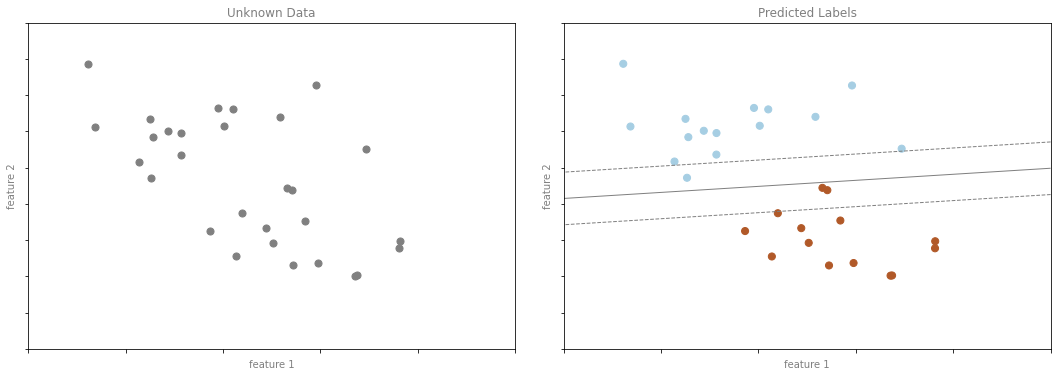

In [12]:
# plot the results
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X2[:, 0], X2[:, 1], c='gray', **point_style)
ax[0].axis([-1, 4, -2, 7])

ax[1].scatter(X2[:, 0], X2[:, 1], c=y2, **point_style)
ax[1].contour(xy1, xy2, Z, **line_style)
ax[1].axis([-1, 4, -2, 7])

format_plot(ax[0], 'Unknown Data')
format_plot(ax[1], 'Predicted Labels')


## Задача регрессии: предсказание непрерывных значений

In [13]:
from sklearn.linear_model import LinearRegression

# Create some data for the regression
rng = np.random.RandomState(1)

X = rng.randn(200, 2)
y = np.dot(X, [-2, 1]) + 0.1 * rng.randn(X.shape[0])

# fit the regression model
model = LinearRegression()
model.fit(X, y)

# create some new points to predict
X2 = rng.randn(100, 2)

# predict the labels
y2 = model.predict(X2)

(-4.0, 4.0, -3.0, 3.0)

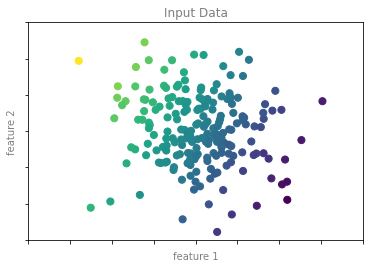

In [14]:
# plot data points
fig, ax = plt.subplots()
points = ax.scatter(X[:, 0], X[:, 1], c=y, s=50,
                    cmap='viridis')

# format plot
format_plot(ax, 'Input Data')
ax.axis([-4, 4, -3, 3])

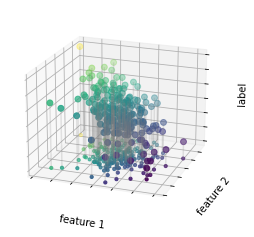

In [15]:
from mpl_toolkits.mplot3d.art3d import Line3DCollection

points = np.hstack([X, y[:, None]]).reshape(-1, 1, 3)
segments = np.hstack([points, points])
segments[:, 0, 2] = -8

# plot points in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c=y, s=35,
           cmap='viridis')
ax.add_collection3d(Line3DCollection(segments, colors='gray', alpha=0.2))
ax.scatter(X[:, 0], X[:, 1], -8 + np.zeros(X.shape[0]), c=y, s=10,
           cmap='viridis')

# format plot
ax.patch.set_facecolor('white')
ax.view_init(elev=20, azim=-70)
ax.set_zlim3d(-8, 8)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.zaxis.set_major_formatter(plt.NullFormatter())
ax.set(xlabel='feature 1', ylabel='feature 2', zlabel='label')

# Hide axes (is there a better way?)
ax.w_xaxis.line.set_visible(False)
ax.w_yaxis.line.set_visible(False)
ax.w_zaxis.line.set_visible(False)
for tick in ax.w_xaxis.get_ticklines():
    tick.set_visible(False)
for tick in ax.w_yaxis.get_ticklines():
    tick.set_visible(False)
for tick in ax.w_zaxis.get_ticklines():
    tick.set_visible(False)

(-4.0, 4.0, -3.0, 3.0)

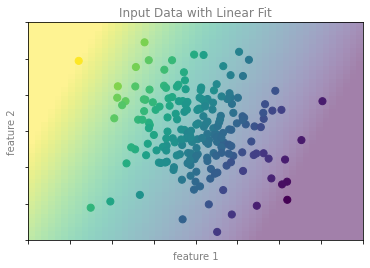

In [16]:
from matplotlib.collections import LineCollection

# plot data points
fig, ax = plt.subplots()
pts = ax.scatter(X[:, 0], X[:, 1], c=y, s=50,
                 cmap='viridis', zorder=2)

# compute and plot model color mesh
xx, yy = np.meshgrid(np.linspace(-4, 4),
                     np.linspace(-3, 3))
Xfit = np.vstack([xx.ravel(), yy.ravel()]).T
yfit = model.predict(Xfit)
zz = yfit.reshape(xx.shape)
ax.pcolorfast([-4, 4], [-3, 3], zz, alpha=0.5,
              cmap='viridis', norm=pts.norm, zorder=1)

# format plot
format_plot(ax, 'Input Data with Linear Fit')
ax.axis([-4, 4, -3, 3])

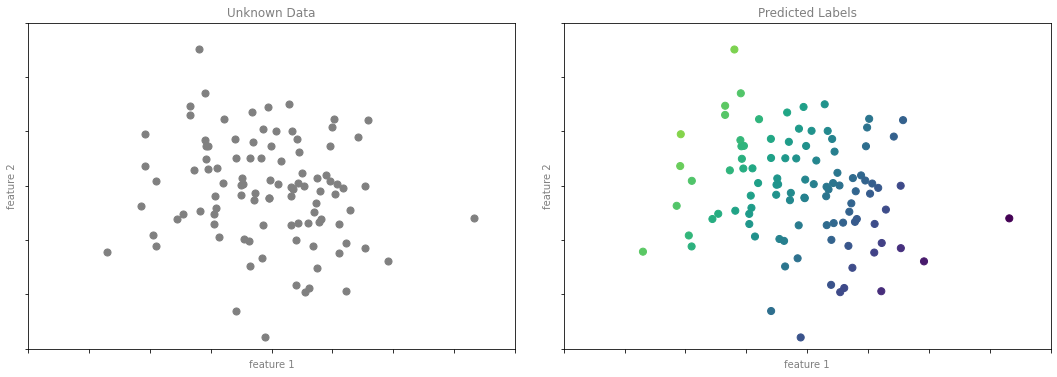

In [17]:
# plot the model fit
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X2[:, 0], X2[:, 1], c='gray', s=50)
ax[0].axis([-4, 4, -3, 3])
ax[1].scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='viridis', norm=pts.norm)
ax[1].axis([-4, 4, -3, 3])

# format plots
format_plot(ax[0], 'Unknown Data'    )
format_plot(ax[1], 'Predicted Labels')

## Введение в Scikit-Learn

Существует несколько библиотек, которые обеспечивают надежную реализацию ряда алгоритмов машинного обучения (machine learning).
Одной из наиболее известных является [Scikit-Learn](http://scikit-learn.org), пакет, предоставляющий эффективные версии большого количества популярных алгоритмов.
Scikit-Learn характеризуется чистым, единообразным и простым API, а также очень полезной и полной онлайн-документацией.
Преимущество такого единообразия заключается в том, что, поняв основные принципы использования и синтаксис Scikit-Learn для одного типа модели, можно легко перейти к новой модели или алгоритму.

В семинаре представлен обзор Scikit-Learn API. Твердое понимание элементов API станет основой для более глубокого понимания алгоритмов и подходов машинного обучения.

Мы начнем с рассмотрения представления данных в Scikit-Learn, затем углубимся в API Estimator и, наконец, рассмотрим пример использования этих инструментов для изучения набора изображений рукописных цифр.

## Представление данных в Scikit-Learn

`Машинное Обучение` - это разработка моделей на основе данных: по этой причине мы начнем с того, как данные могут быть представлены.
Лучший способ представления данных в Scikit-Learn - это `таблицы`.

Таблица - это двумерная матрица данных, в которой строки представляют отдельные элементы набора данных, а столбцы - величины, связанные с каждым из этих элементов.
Например, рассмотрим набор данных [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), анализ которого провел Рональд Фишер в 1936 году.
Мы можем загрузить этот набор данных в виде Pandas `DataFrame` с помощью библиотеки [Seaborn](http://seaborn.pydata.org/).

sepal_length - длина чашелистика, sepal_width - ширина чашелистика, petal_length - длина лепестка, petal_width - ширина лепестка, species - виды



![Iris dataset](images/iris_dataset.jpg)
    




In [6]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Cтроки матрицы будем называть `samples` (примерами), число строк соответствует общему числу цветков в наборе данных `n_samples`.

Столбцы матрицы будем называть `features` (признаками), количество столбцов соответствует общему числу признаков `n_features`.

### The Features Matrix (Матрица признаков)

Таблица показывает, что информацию можно представить в виде двумерного числового массива или матрицы, которую мы будем называть `матрицей признаков`.
По традиции, эта матрица часто хранится в переменной с именем `X`.
Матрица признаков предполагается двумерной, с размерами `[n_samples, n_features]`, и чаще всего содержится в массиве NumPy или Pandas `DataFrame`, хотя некоторые модели Scikit-Learn также принимают разреженные матрицы SciPy.

Выборки (т.е. строки) всегда относятся к отдельным объектам, описываемым набором данных.
Например, образец может представлять цветок, человека, документ, изображение, звуковой файл, видео, астрономический объект или что-либо другое, что можно описать с помощью набора количественных измерений.

Признаки (т.е. столбцы) всегда относятся к отдельным наблюдениям, которые количественно описывают каждый образец.
Признаки часто имеют вещественное значение, но в некоторых случаях могут быть булевыми или дискретными.

### The Target Array (Целевой массив)

В дополнение к матрице признаков `X`, мы обычно работаем с *меткой* или *целевым* массивом, который условно мы обычно называем `y`.
Целевой массив обычно одномерный, с длиной `n_samples`, и хранится в массиве NumPy или Pandas `Series`.
Целевой массив может иметь непрерывные числовые значения или дискретные значения (классы).
Хотя некоторые модели Scikit-Learn обрабатывают целевые значений в виде двумерной матрицы `[n_samples, n_targets]`, мы будем работать в основном с обычным случаем одномерного целевого вектора `[n_samples]`.

Часто возникает путаница в том, чем целевой массив отличается от других столбцов признаков. Отличительной особенностью целевого массива является то, что он обычно представляет собой величину, которую мы хотим *прогнозировать по признакам*: в статистических терминах это зависимая переменная.
Например, учитывая предыдущие данные, мы можем захотеть построить модель, которая может предсказать вид цветка на основе других измерений; в этом случае столбец `species` будет считаться целевым массивом.

![Iris dataset](images/samples-features.png)

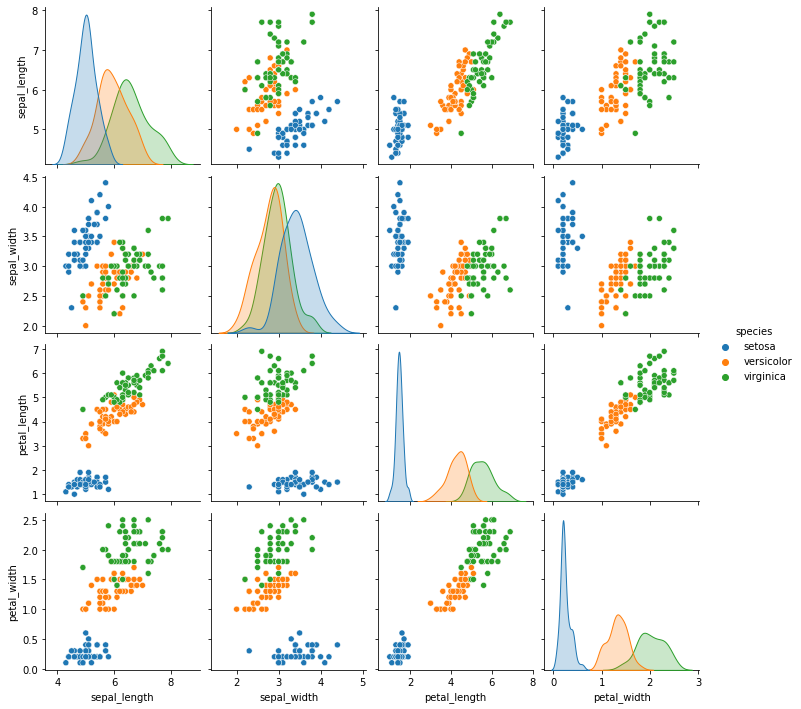

In [7]:
%matplotlib inline
import seaborn as sns
sns.pairplot(iris, hue='species', height=2.5);

In [8]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [9]:
y_iris = iris['species']
y_iris.shape

(150,)

## The Estimator API

Scikit-Learn API разработан с учетом следующих принципов, изложенных в [Scikit-Learn API paper](http://arxiv.org/abs/1309.0238):

- *Согласованность*: Все объекты имеют общий интерфейс, основанный на ограниченном наборе методов.

- *Контроль*: Все заданные значения параметров раскрываются, как публичные атрибуты.

- *Ограниченная иерархия объектов*: Только алгоритмы представлены классами Python; наборы данных представлены
  в стандартных форматах (массивы NumPy, объекты Pandas `DataFrame`, разреженные матрицы SciPy), а имена параметров используют стандартные строки Python.

- *Композиция*: Многие задачи машинного обучения могут быть выражены как последовательности более фундаментальных алгоритмов,
  и Scikit-Learn использует это везде, где это возможно.

- *Удобные значения по умолчанию*: Когда модели требуют заданных пользователем параметров, библиотека определяет соответствующее значение по умолчанию.

На практике эти принципы делают Scikit-Learn очень простой в использовании, если понять основные принципы.
Каждый алгоритм машинного обучения в Scikit-Learn реализован через API Estimator, который обеспечивает согласованный интерфейс для широкого спектра задач машинного обучения.

### Basics of the API

Чаще всего использование API Scikit-Learn Estimator происходит следующим образом:

1. Выбирается класс модели, импортировав соответствующий класс из Scikit-Learn.
2. Подбираем значения гиперпараметров модели, инстанцировав класс модели с нужными значениями параметров.
3. Разделение данные на матрицу признаков и целевой вектор.
4. Настройка модели посредством метода `fit` экземпляра модели.
5. Применение модели к новым данным:
   - Для `supervised learning` (обучение с учителем) мы предсказываем метки для неизвестных данных с помощью метода `predict`.
   - Для `unsupervised learning` (обучение без учителя) мы преобразуем или оцениваем свойства примеров из набора данных с помощью методов `transform` или `predict`.

### Пример обучения с учителем: KNN, задача классификации

#### 1. Выбираем класс модели

В Scikit-Learn каждый класс модели представлен классом Python.
В нашем примере мы хотим использовать модель `KNeighborsClassifier`.

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
?KNeighborsClassifier

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape

#### 2. Подбираем значения гиперпараметров модели

Важным моментом является то, что *класс модели - это не то же самое, что экземпляр модели*.

После того, как мы определились с классом модели KNeighborsClassifier требуется создать объект этого класса и задать *гиперпараметры* модели, параметр *n_neighbors*

In [26]:
# Fitting clasifier to the Training set
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

#### 3. Упорядочение данных в матрицу признаков и целевой вектор

Ранее мы подробно описали представление данных Scikit-Learn, которое требует двумерную матрицу признаков и одномерный целевой массив.
Здесь наша целевая переменная ``y`` уже имеет правильную форму (массив длины ``n_samples``), но нам нужно изменить данные ``x``, чтобы сделать их матрицей размера ``[n_samples, n_features]``.
В данном случае это сводится к простой перестройке одномерного массива:

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import LabelEncoder

label_encoder = LabelEncoder()
y_iris = label_encoder.fit_transform(y_iris)

X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, test_size = 0.2, random_state = 0)

#### 4. Настройка модели

Теперь пришло время применить нашу модель к данным.
Это можно сделать с помощью метода ``fit()`` модели:

In [28]:
# Fitting the model
classifier.fit(X_iris_train, y_iris_train)

KNeighborsClassifier(n_neighbors=3)

#### 5. Предсказать метки для неизвестных данных

После обучения модели основной задачей контролируемого машинного обучения является ее оценка на основе того, что она говорит о новых данных, которые не были частью обучающего набора.
В Scikit-Learn это можно сделать с помощью метода ``predict()``.
В данном примере "новые данные" будут представлять собой сетку значений *x*, и мы спросим, какие значения *y* предсказывает модель:

In [29]:
# Predicting the Test set results
y_iris_pred = classifier.predict(X_iris_test)

In [30]:
cm = confusion_matrix(y_iris_test, y_iris_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [31]:
accuracy = accuracy_score(y_iris_test, y_iris_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


#### В пункте 4 мы подобрали значение гиперпараметра произвольным образом модели. Можно ли улучшить результат? 